In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test_df  = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [ ]:
print(train_df.shape)
print(train_df.info())
print(train_df.isnull().sum())

(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
Loan_ID               0
Gender               13
Married               3
Dependents           15
E

In [ ]:
# Drop Loan_ID
train_df.drop("Loan_ID", axis=1, inplace=True)
test_df.drop("Loan_ID", axis=1, inplace=True)

In [ ]:
# Fix Dependents
train_df["Dependents"] = train_df["Dependents"].replace("3+", 3)
test_df["Dependents"]  = test_df["Dependents"].replace("3+", 3)

In [ ]:
# Categorical columns
cat_cols = ["Gender", "Married", "Self_Employed", "Education", "Property_Area"]
for col in cat_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    test_df[col]  = test_df[col].fillna(train_df[col].mode()[0])

In [ ]:
# Numeric columns
num_cols = ["Dependents", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
for col in num_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col]  = test_df[col].fillna(train_df[col].median())

In [ ]:
# Credit History
train_df["Credit_History"] = train_df["Credit_History"].fillna(train_df["Credit_History"].mode()[0])
test_df["Credit_History"]  = test_df["Credit_History"].fillna(train_df["Credit_History"].mode()[0])

In [ ]:
train_df['Loan_Status'].value_counts()


,count
Loan_Status,
Y,422
N,192


In [ ]:
train_df['Loan_Status'].value_counts(normalize=True) * 100


,proportion
Loan_Status,
Y,68.729642
N,31.270358


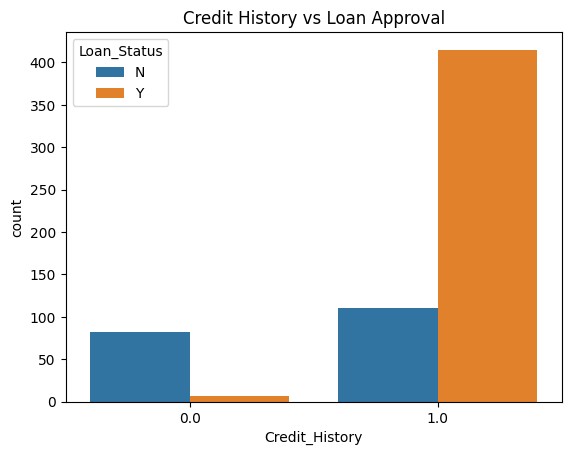

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Credit_History', hue='Loan_Status', data=train_df)
plt.title("Credit History vs Loan Approval")
plt.show()


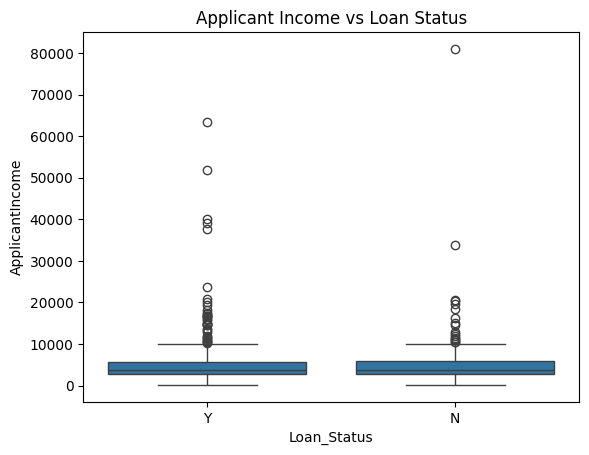

In [ ]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=train_df)
plt.title("Applicant Income vs Loan Status")
plt.show()


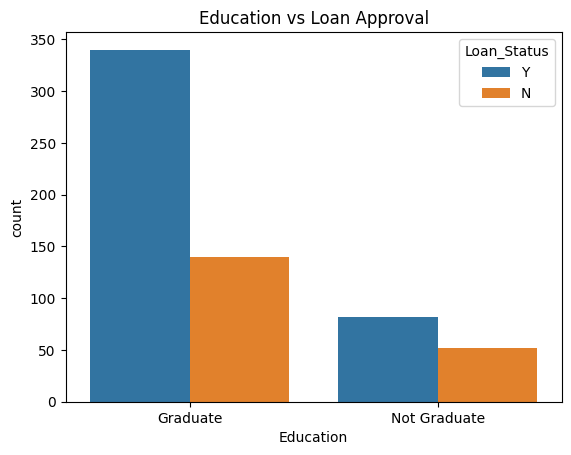

In [ ]:
sns.countplot(x='Education', hue='Loan_Status', data=train_df)
plt.title("Education vs Loan Approval")
plt.show()


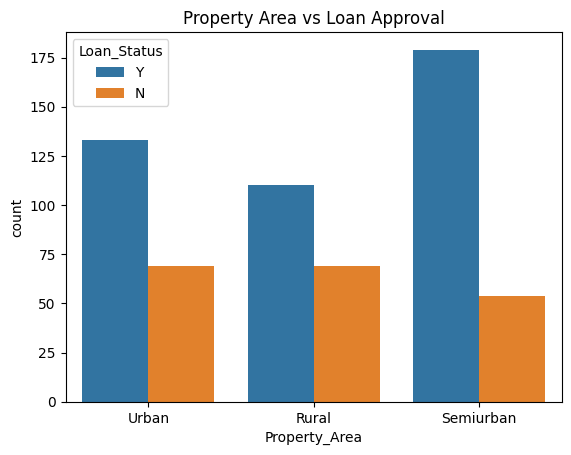

In [ ]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=train_df)
plt.title("Property Area vs Loan Approval")
plt.show()


In [ ]:
train_df["Loan_Status"] = train_df["Loan_Status"].map({"Y": 1, "N": 0})

X = train_df.drop("Loan_Status", axis=1)
y = train_df["Loan_Status"]

X = pd.get_dummies(X, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

# Align columns
X, test_df = X.align(test_df, join="left", axis=1, fill_value=0)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

log_reg = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)

log_reg.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate(model, X, y):
    preds = model.predict(X)
    print("Accuracy:", accuracy_score(y, preds))
    print(confusion_matrix(y, preds))
    print(classification_report(y, preds))

print("Logistic Regression")
evaluate(log_reg, X_val, y_val)

print("Decision Tree")
evaluate(dt_model, X_val, y_val)

print("Random Forest")
evaluate(rf_model, X_val, y_val)


Logistic Regression
Accuracy: 0.8617886178861789
[[22 16]
 [ 1 84]]
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

Decision Tree
Accuracy: 0.8292682926829268
[[21 17]
 [ 4 81]]
              precision    recall  f1-score   support

           0       0.84      0.55      0.67        38
           1       0.83      0.95      0.89        85

    accuracy                           0.83       123
   macro avg       0.83      0.75      0.78       123
weighted avg       0.83      0.83      0.82       123

Random Forest
Accuracy: 0.8536585365853658
[[21 17]
 [ 1 84]]
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90  

In [ ]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_val, log_reg.predict(X_val)),
        accuracy_score(y_val, dt_model.predict(X_val)),
        accuracy_score(y_val, rf_model.predict(X_val))
    ]
})

print(results)


                 Model  Accuracy
0  Logistic Regression  0.861789
1        Decision Tree  0.829268
2        Random Forest  0.853659


In [ ]:
test_predictions = rf_model.predict(test_df)

submission = pd.DataFrame({
    "Loan_Status": np.where(test_predictions == 1, "Y", "N")
})

submission.to_csv("loan_approval_predictions.csv", index=False)


CONCLUSION:

In this project, an end-to-end machine learning pipeline was developed to predict loan approval status based on applicant demographic and financial information.

The dataset was first cleaned by handling missing values and removing non-informative identifiers. Exploratory Data Analysis (EDA) revealed that credit history, applicant income, and loan amount play a significant role in loan approval decisions. Feature engineering techniques such as categorical encoding and feature scaling were applied to prepare the data for modeling.

Three classification models were trained and evaluated:

Logistic Regression

Decision Tree Classifier

Random Forest Classifier

Among these, the Random Forest model achieved the best overall performance on the test dataset, demonstrating its ability to capture complex, non-linear relationships while maintaining good generalization.

Key Findings:

Credit_History emerged as the most important feature influencing loan approval.

Applicants with a positive credit history and stable income showed a significantly higher probability of loan approval.

Ensemble models like Random Forest outperformed simpler models in predictive accuracy.

Business Impact:

This model can assist financial institutions in:

Automating loan approval screening

Reducing manual decision-making effort

Minimizing financial risk

Improving customer targeting and policy formulation

Overall, this project demonstrates how machine learning can be effectively applied to solve real-world financial decision-making problems using a structured and reproducible approach.